In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
TChem_install = '/Users/odiazib/csp_clang_bld_develop/csp/install/release'
sys.path.append(TChem_install+'/example/runs/scripts/')
from CSPindexHelper import *
import os
os.getcwd() 

'/Users/odiazib/data/ChrisBlais/PFR'

In [2]:
outDir = ''
data = np.genfromtxt(outDir+"PFRSolution.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(np.float)
print(np.shape(solTchem))

(801, 69)


/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/odiazib/opt/miniconda3/envs/cantera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

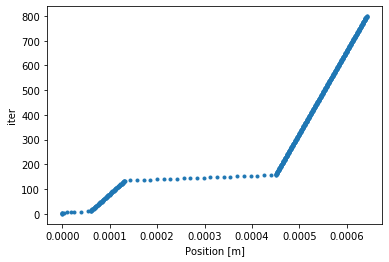

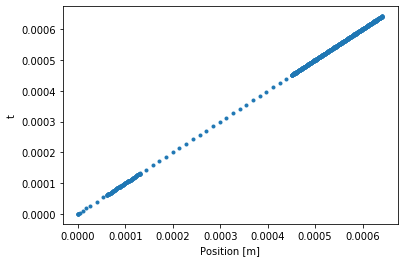

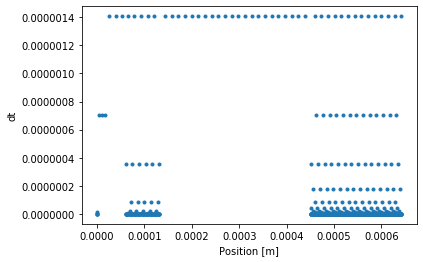

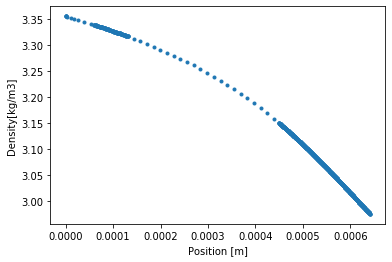

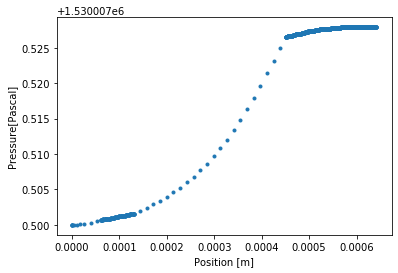

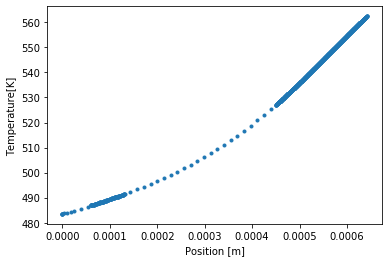

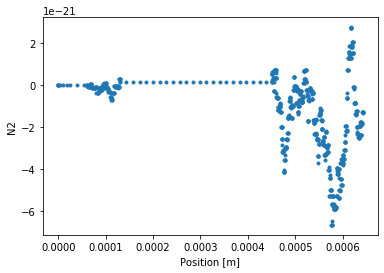

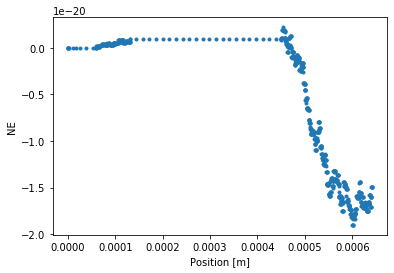

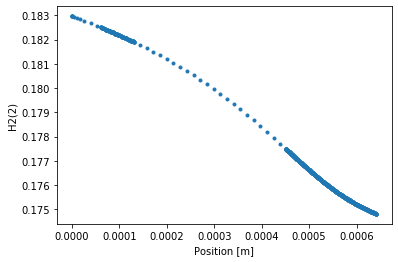

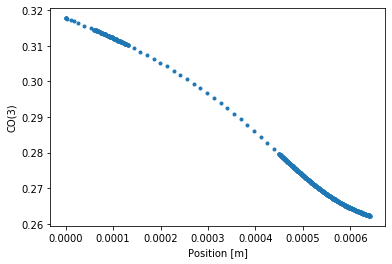

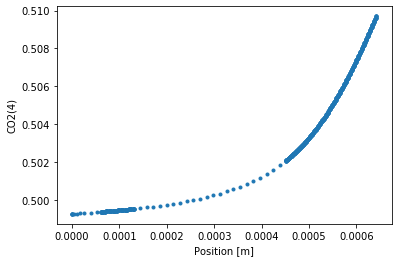

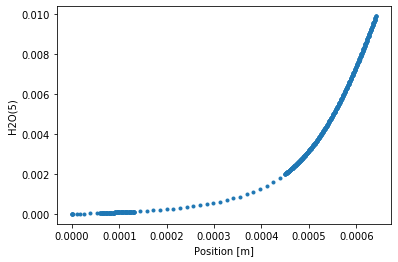

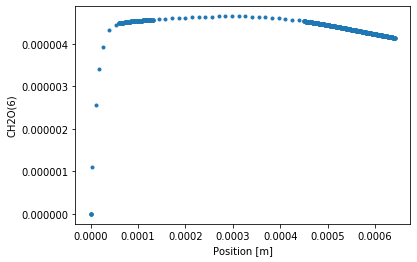

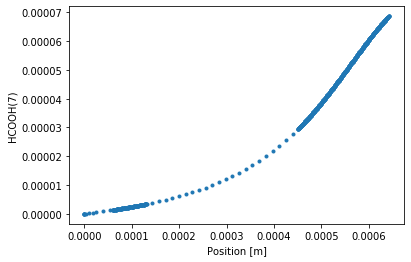

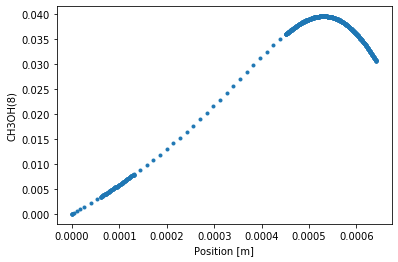

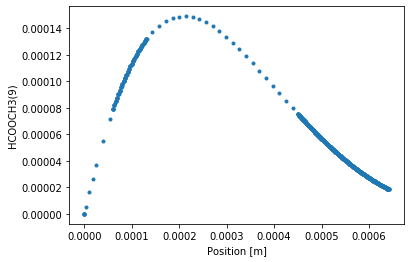

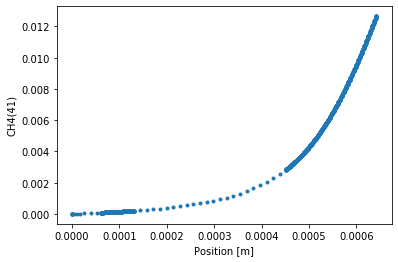

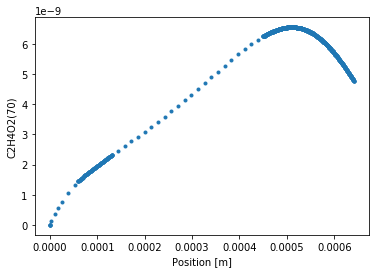

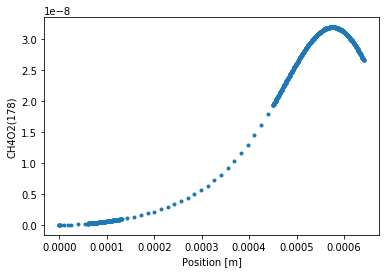

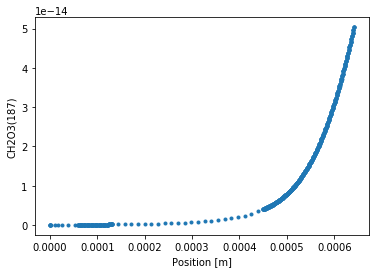

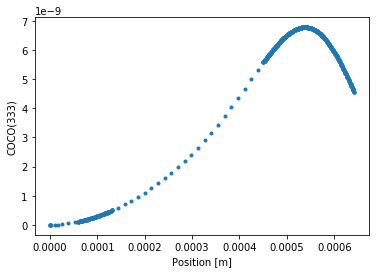

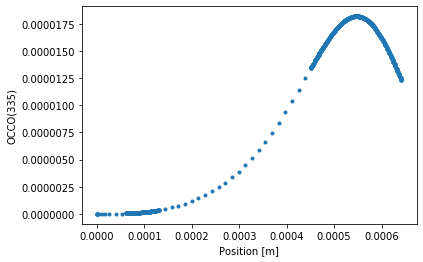

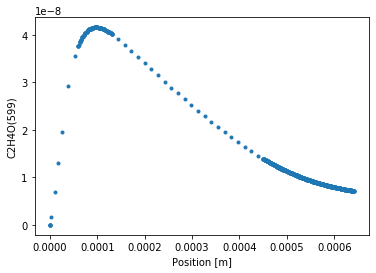

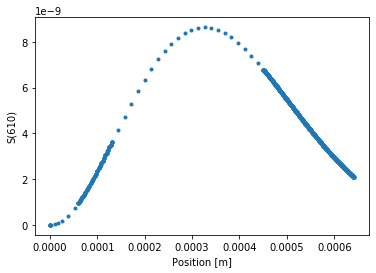

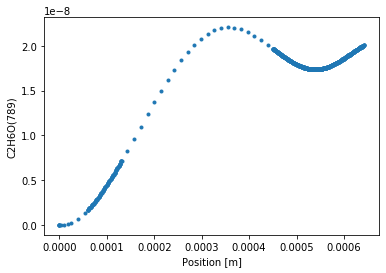

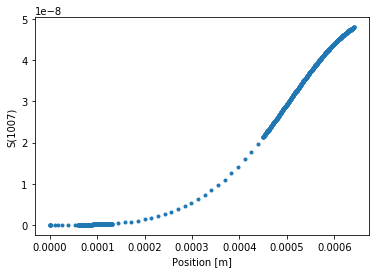

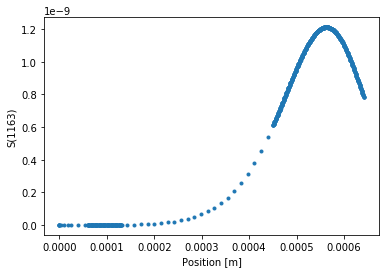

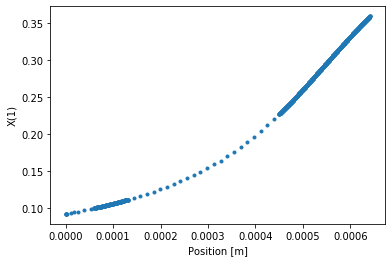

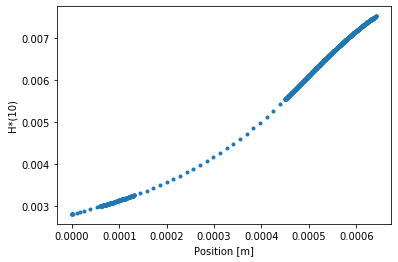

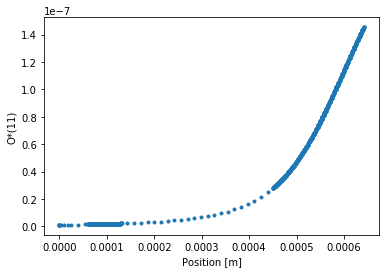

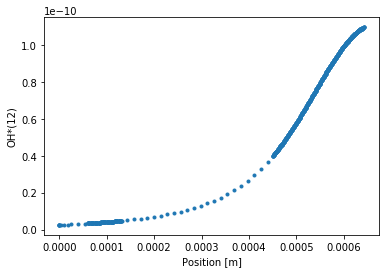

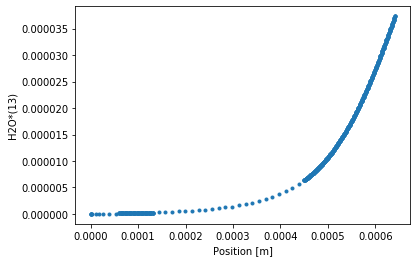

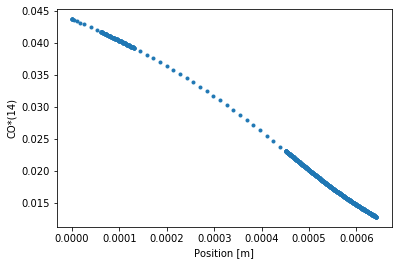

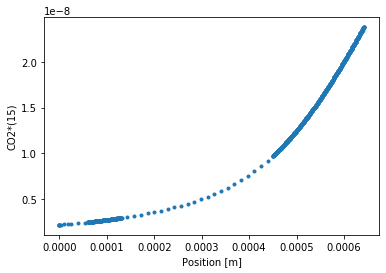

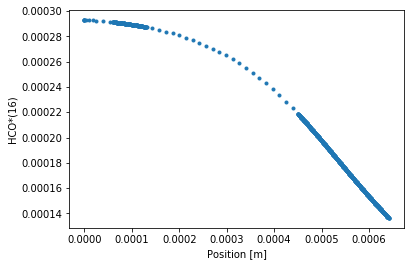

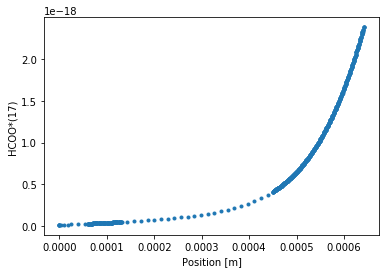

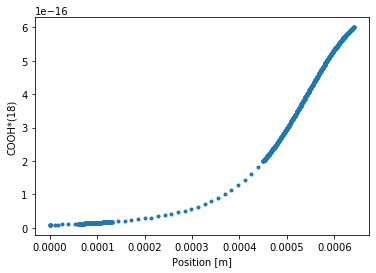

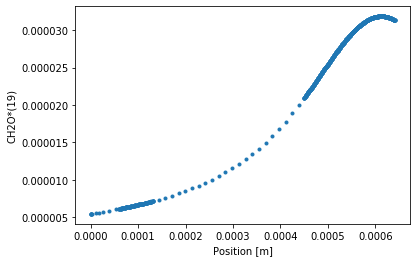

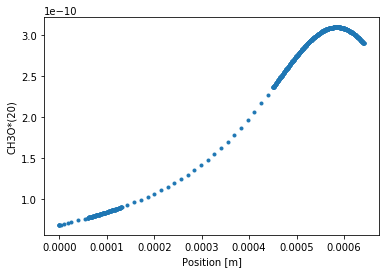

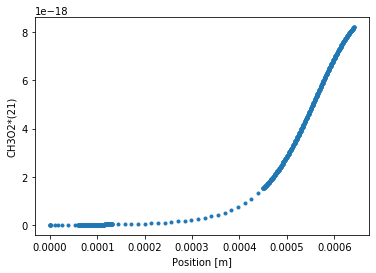

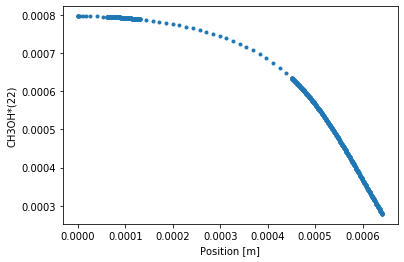

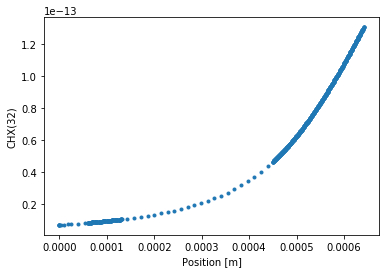

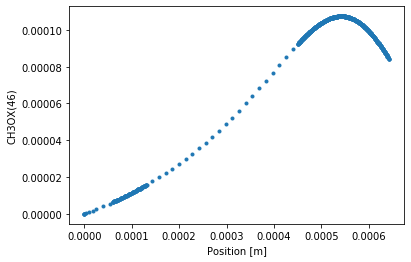

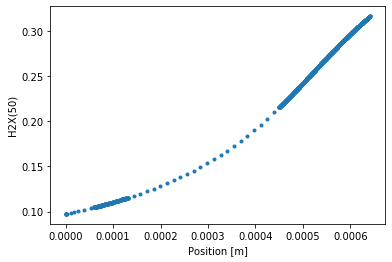

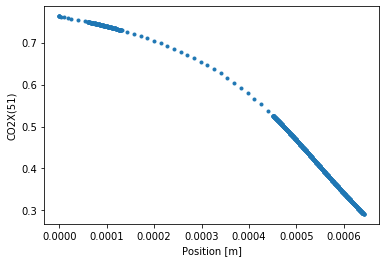

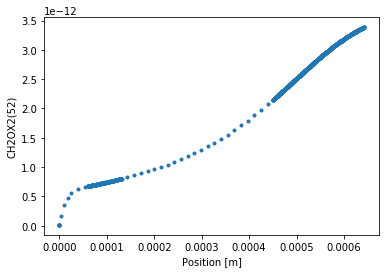

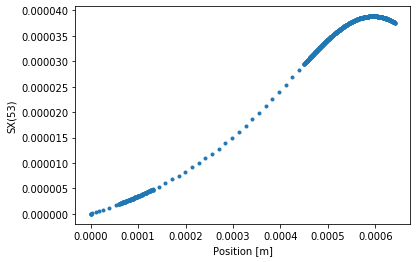

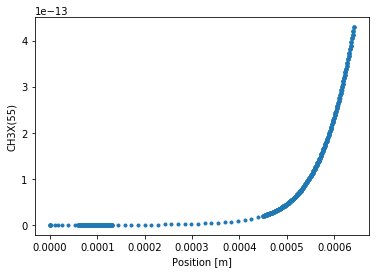

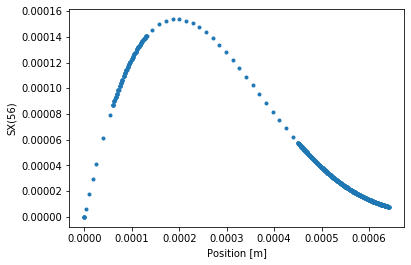

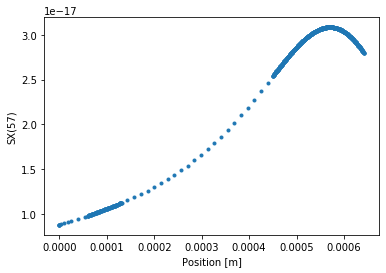

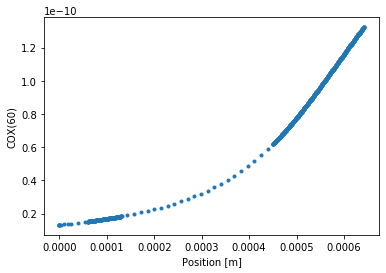

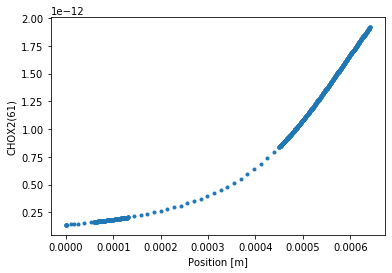

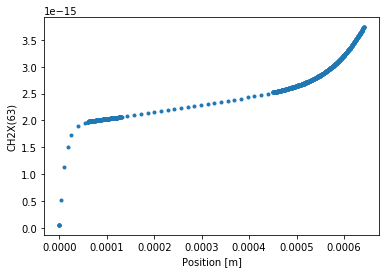

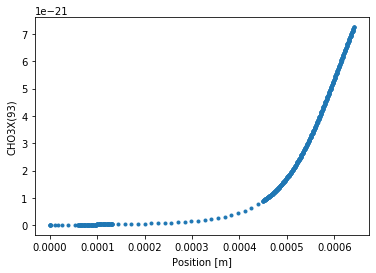

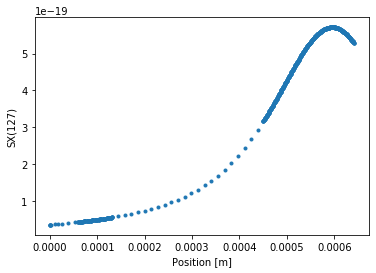

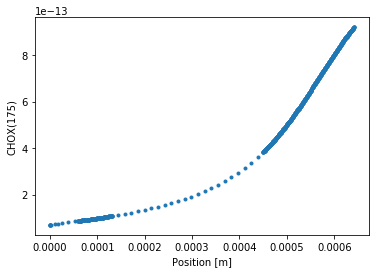

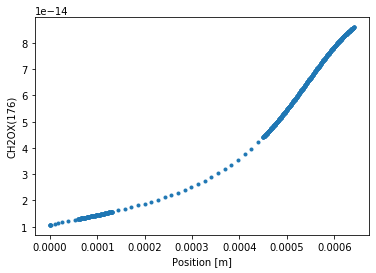

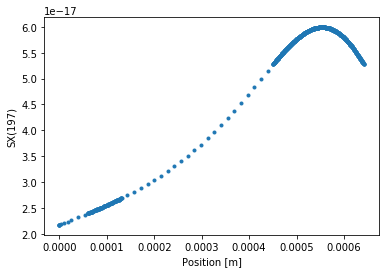

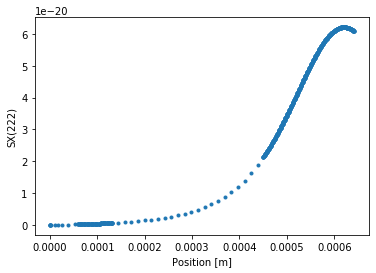

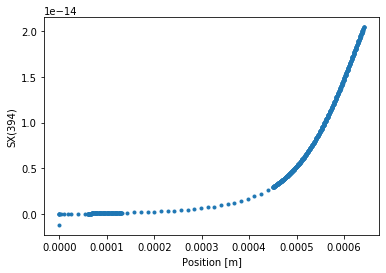

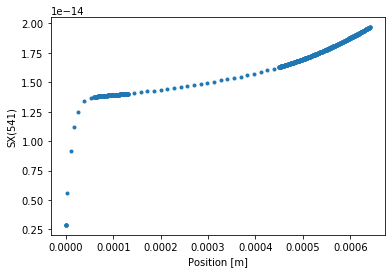

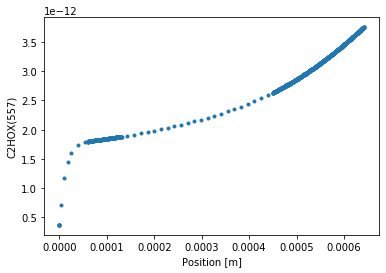

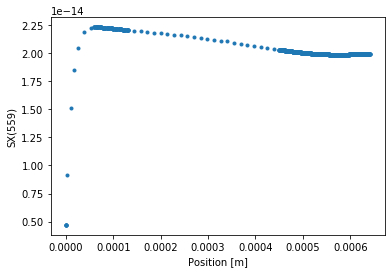

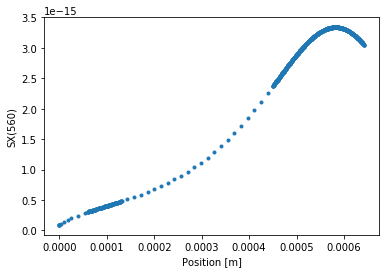

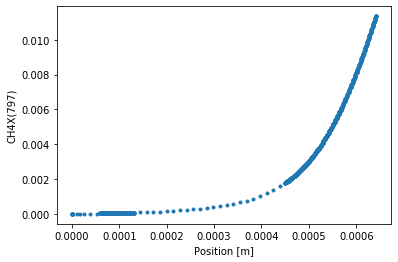

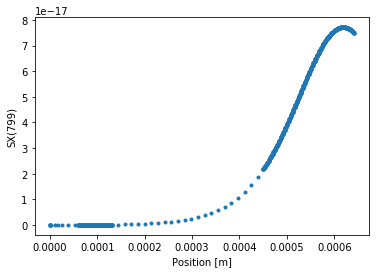

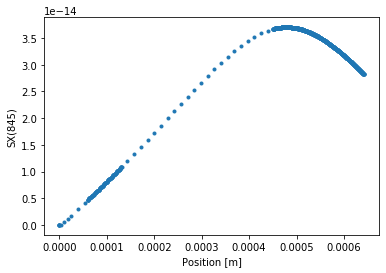

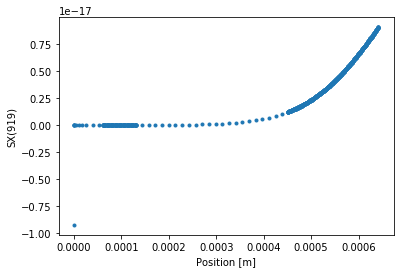

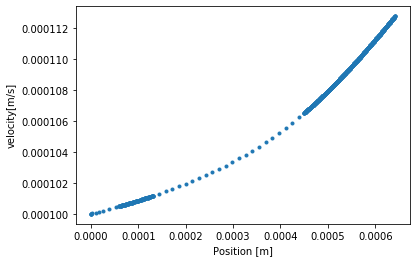

In [3]:
for var in Header:
    plt.figure()
    plt.plot(solTchem[:, Header.index('t')], solTchem[:, Header.index(var),],'.')
    plt.xlabel('Position [m]')
    plt.ylabel(var)

In [4]:
outDir =''
firstname ='csp_output/'
m = np.loadtxt(outDir + firstname +'_m.dat')
# mold = np.loadtxt(outDir + firstname +'_mold.dat')

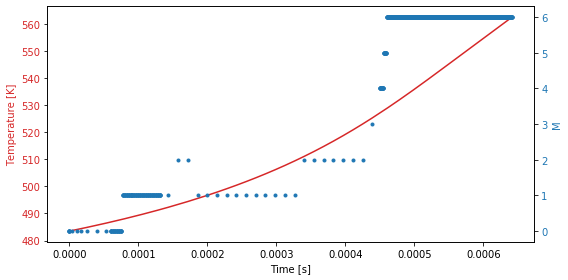

In [5]:
fig, ax1 = plt.subplots(figsize=(8,4))

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Temperature [K]', color=color)
ax1.plot(solTchem[:,1], solTchem[:,5], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('M',color=color)  # we already handled the x-label with ax1
ax2.plot(solTchem[:,1], m,'.',  color=color)
# ax2.plot(solTchem[:,1], mold,'gs')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('M.pdf')

In [6]:
tau = np.loadtxt(outDir + firstname +'_tau.dat')
Nvar = len(tau[0,:])
tmp = []
for i,M in enumerate(m):
    if (M == Nvar ):
        tmp += [tau[i,int(M-1)]]     
    else:
        tmp += [tau[i,int(M)]] 

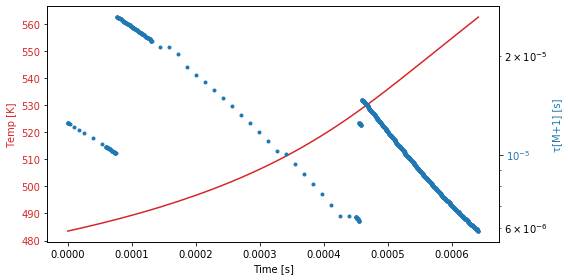

In [7]:
fig, ax1 = plt.subplots(figsize=(8,4))

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Temp [K]', color=color)
ax1.plot(solTchem[:,1], solTchem[:,5], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('τ[M+1] [s]',color=color)  # we already handled the x-label with ax1
ax2.plot(solTchem[:,1], tmp,'.',  color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('tauMp.pdf')

In [8]:
rank_jac= np.loadtxt(firstname +'_jac_numerical_rank.dat')

In [9]:
tmrank = []
for i,M in enumerate(m):
    if rank_jac[i] == Nvar:
        tmrank += [tau[i,Nvar-1]]
    else:    
        tmrank += [tau[i,int(rank_jac[i])]]

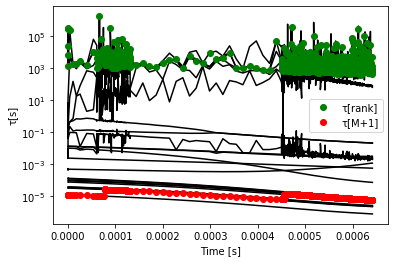

In [10]:
plt.figure()

for i in range(len(tau[0,:])):
    plt.plot(solTchem[:,1],tau[:,i],'k')
plt.plot(solTchem[:,1],tmrank,'go', label='τ[rank]')  
plt.plot(solTchem[:,1],tmp,'ro', label='τ[M+1]')    
plt.xlabel('Time [s]')
plt.ylabel('τ[s]')
plt.yscale('log')
plt.legend(loc='best')
# plt.xlim([-5e-4,2])
# plt.ylim([1e-10,1e16])
plt.savefig('timeScales.pdf')

In [11]:
Rnames = np.loadtxt('kmod.reactions',dtype=np.str,delimiter=",")

rfwdL = []
rrevL = []
ElementPositionFwd = []
ElementPositionRev = []
for i, Reac in enumerate(Rnames):
    if ('<=>' in Reac[0]):
        simb = '<=>'
    elif ('=>' in Reac[0]):
        simb = '=>'
    elif ('<=' in Reac[0]):
        simb = '<='
    elif ('=' in Reac[0]):
        simb = '='
    else:
        print('something is wrong')
        
    out = np.char.split(Reac,simb)[0]

    rfwd = out[0] + '=>' + out[1]
    rrev = out[0] + '<=' + out[1]
    rfwdL += [rfwd]
    rrevL += [rrev]
    ElementPositionFwd +=[i + 1]
    ElementPositionRev +=[-(i+1)]
    
    
logNamesReactions =  rfwdL +  rrevL      
NgasReac = 2*len(Rnames)
ElementPosition = ElementPositionFwd + ElementPositionRev

In [12]:
RnamesSurf = np.loadtxt('kmodSurf.reactions',dtype=np.str,delimiter=",")
rfwdLSurf = []
rrevLSurf = []
ElementPositionSFwd = []
ElementPositionSRev = []
for i,Reac in enumerate(RnamesSurf):
    if ('<=>' in Reac[0]):
        simb = '<=>'
    elif ('=>' in Reac[0]):
        simb = '=>'
    elif ('<=' in Reac[0]):
        simb = '<='
    elif ('=' in Reac[0]):
        simb = '='
    else:
        print('something is wrong')
        
    out = np.char.split(Reac,simb)[0]

    rfwd = out[0] + '=>' + out[1]
    rrev = out[0] + '<=' + out[1]
    rfwdLSurf += [rfwd]
    rrevLSurf += [rrev]
    ElementPositionSFwd +=[i+1]
    ElementPositionSRev +=[-(i+1)]
    
logNamesReactions +=  rfwdLSurf +  rrevLSurf    
NSurfReac = 2*len(RnamesSurf)
ElementPosition += ElementPositionSFwd + ElementPositionSRev

In [13]:
NtotalReactions= len(logNamesReactions)

In [14]:
print('Total Number of reactions',NtotalReactions)

Total Number of reactions 790


In [15]:
NtimeStep, Ndime = np.shape(solTchem)
species_names = np.loadtxt(firstname+'speciesNames.dat',dtype='str')
ngasSpec = len(species_names)
nameRHS = ['Temperature[K]']
for i in range(len(species_names)):
    nameRHS += [species_names[i]]

In [16]:
def makePlotIndices( t, var, indices, ind_list, namesReactions,\
                   xlabel_1, ylabel_1, ylabel_2, \
                   legend_loc_x, legend_loc_y):
    
    fig, ax1 = plt.subplots()
    color = 'k'
    ax1.set_xlabel(xlabel_1)
    ax1.set_ylabel(ylabel_1, color=color)
    ax1.plot(t,var,'--.', color=color)
    
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel(ylabel_2,color=color)
    
    for i in ind_list:
        ax2.plot(t,\
                 indices[:,i],'-',label=namesReactions[i])
    ax2.legend(loc='best', \
               bbox_to_anchor=(legend_loc_x,legend_loc_y) )
    ax2.tick_params(axis='y', labelcolor=color)
    return 

In [17]:
Slowind = np.loadtxt(firstname +'_SlowImportanceIndex.dat')

In [18]:
St = np.reshape(Slowind,[NtimeStep, Nvar, NtotalReactions])

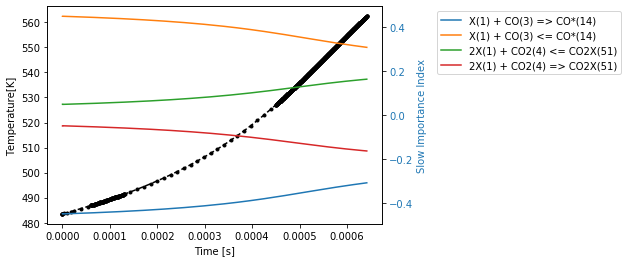

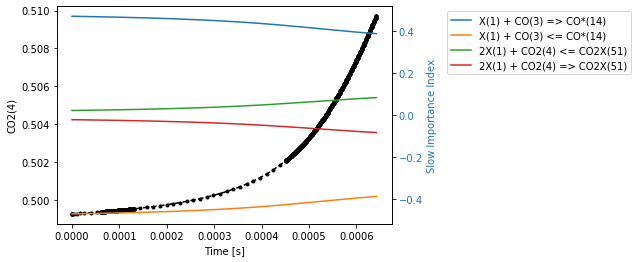

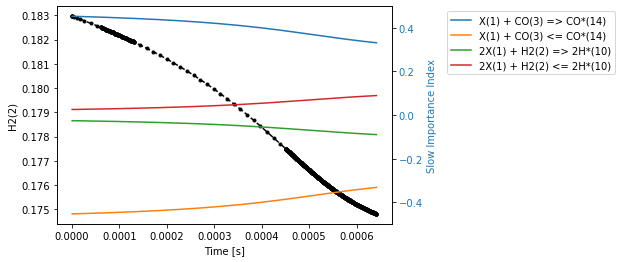

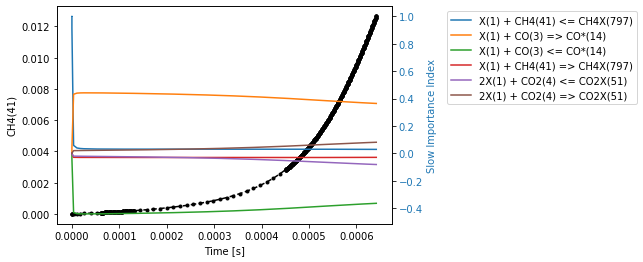

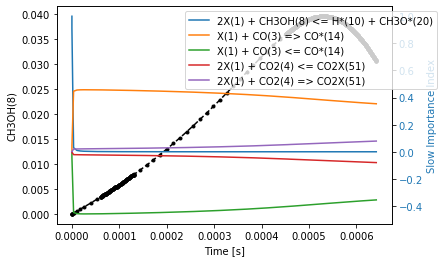

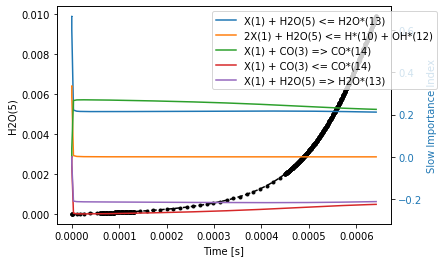

In [38]:
variables = ['Temperature[K]','CO2(4)', 'H2(2)','CH4(41)','CH3OH(8)','H2O(5)']
for VarName in variables:
    IndVar = nameRHS.index(VarName)
    MaxPInd, IndxList = getTopIndex(St, IndVar,Top=4)
    
    makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                St[:,IndVar,:], IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Slow Importance Index', \
                legend_loc_x=1.15, legend_loc_y=1)
    
#     plt.savefig(VarName+'_SlowIndex.pdf', bbox_inches='tight')

In [21]:
Fastind = np.loadtxt(firstname +'_FastImportanceIndex.dat')
Ft = np.reshape(Fastind,[NtimeStep,Nvar,NtotalReactions])

In [36]:
variablesPointers = ['CH4O2(178)','C2H4O2(70)','OCCO(335)','COCO(333)','S(610)']

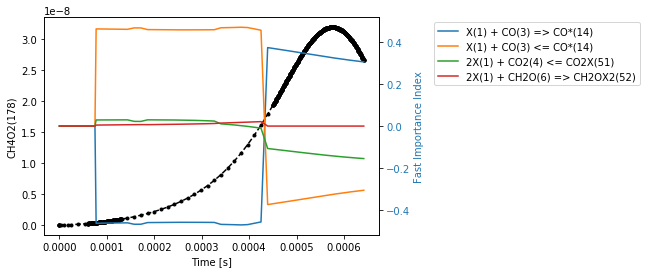

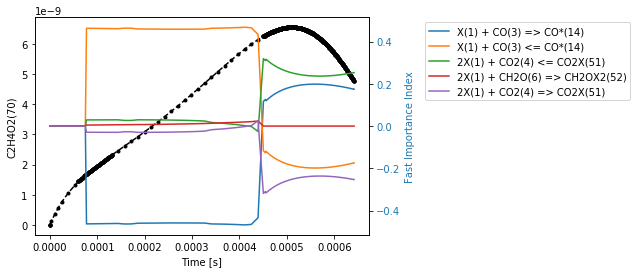

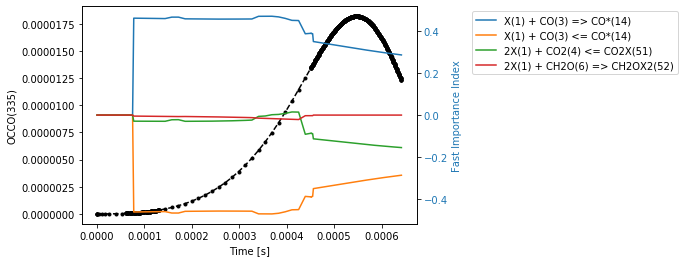

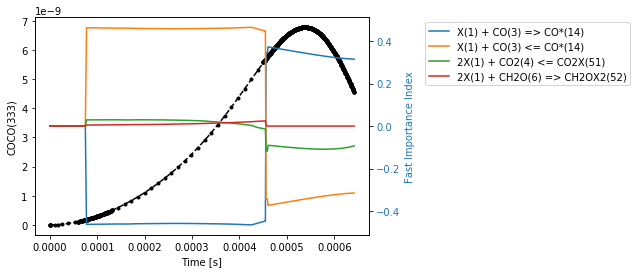

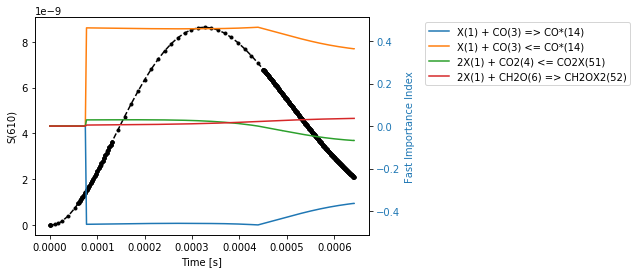

In [37]:
for VarName in variablesPointers:
    IndVar = nameRHS.index(VarName)
    MaxPInd, IndxList = getTopIndex(Ft, IndVar,Top=3)    
    makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                Ft[:,IndVar,:], IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Fast Importance Index', \
                legend_loc_x=1.15, legend_loc_y=1)
#     plt.savefig(VarName+'_FastIndex.pdf', bbox_inches='tight')

In [23]:
PIind = np.loadtxt(firstname +'_ParticipationIndex.dat')
# PIind = np.loadtxt(firstname +'_P_ik.dat')
Pt = np.reshape(PIind,[NtimeStep,Nvar,NtotalReactions])

In [24]:
f = np.loadtxt(outDir + firstname +'_f.dat')

Mode 1
23 2 X(1) + CO(3) => CO*(14)
Mode 2
23 2 X(1) + CO(3) => CO*(14)
469 -64 2X(1) + CO2(4) <= CO2X(51)
Mode 3
23 2 X(1) + CO(3) => CO*(14)
Mode 4
469 -64 2X(1) + CO2(4) <= CO2X(51)
Mode 5
23 2 X(1) + CO(3) => CO*(14)


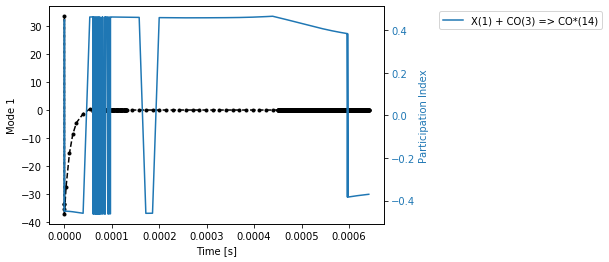

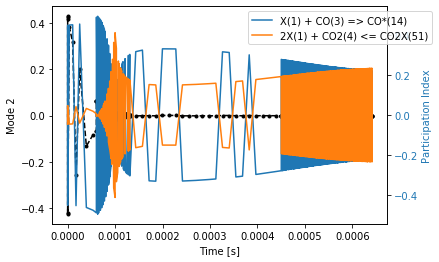

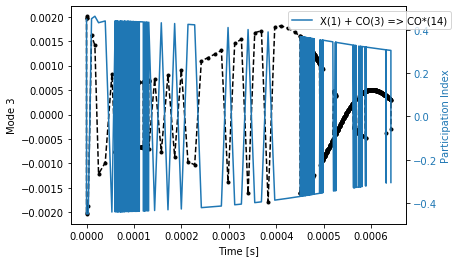

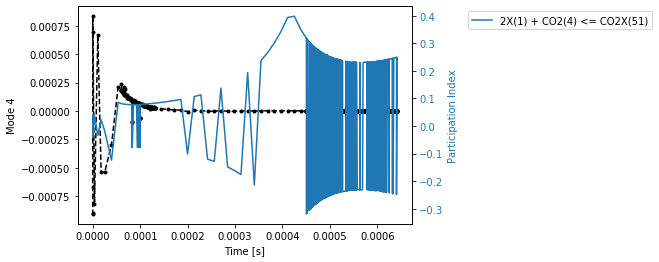

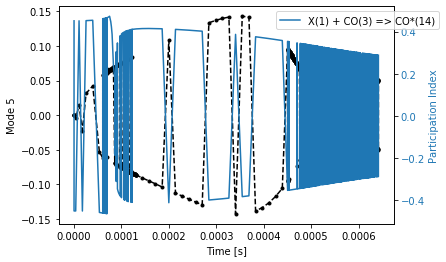

In [39]:
for ModN in range(5):
    VarName = 'Mode '+str(ModN +1)
    IndxList = getPartTopIndex(Pt, ModN, m, Top=1, threshold=1e-2)
    print(VarName)
    for ind in IndxList:
        print (ind,ElementPosition[ind],logNamesReactions[ind])
    makePlotIndices(solTchem[:,Header.index('t')], f[:,ModN],\
                Pt[:,ModN,:], IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Participation Index', \
                legend_loc_x=1.15, legend_loc_y=1)

In [26]:
Pointers = np.loadtxt(firstname +'_cspPointers.dat')
# Pointers = np.loadtxt(firstname +'_cspp_ij.dat')
Ptrs = np.reshape(Pointers,[NtimeStep,Nvar,Nvar])

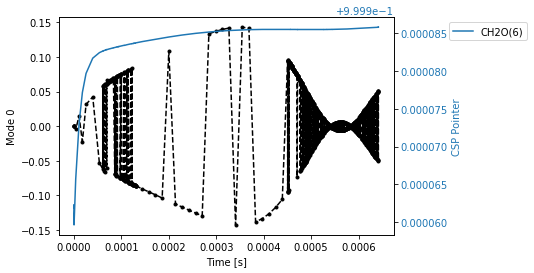

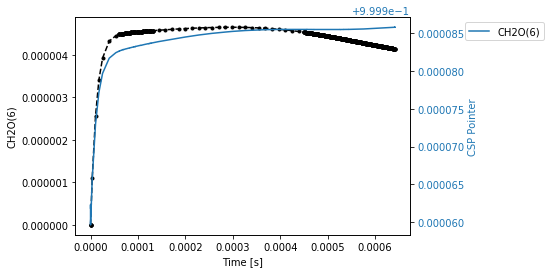

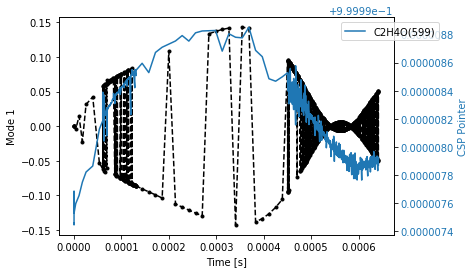

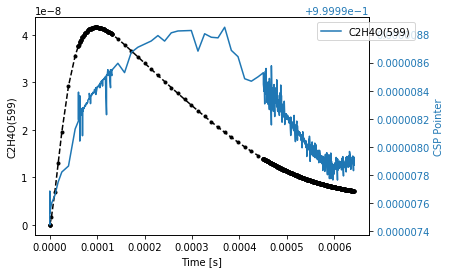

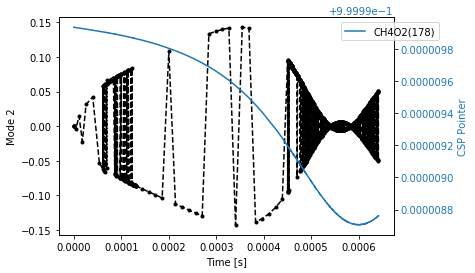

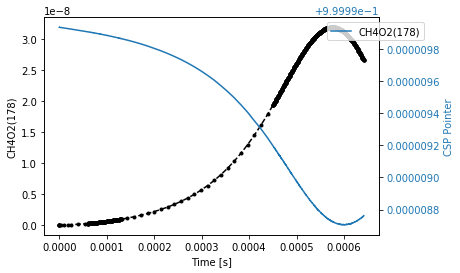

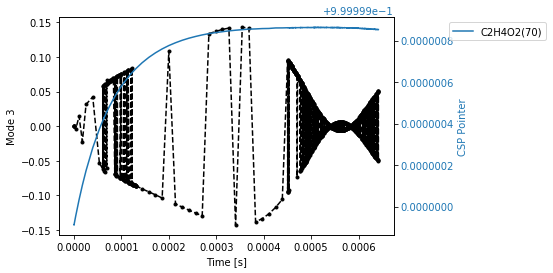

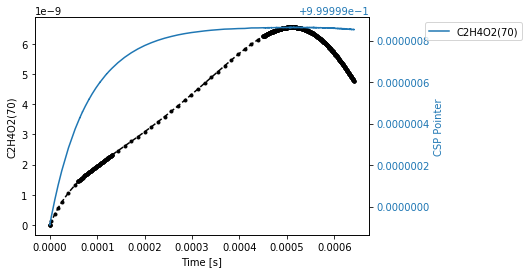

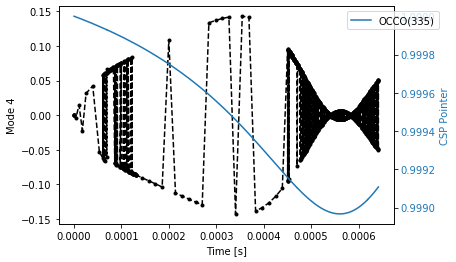

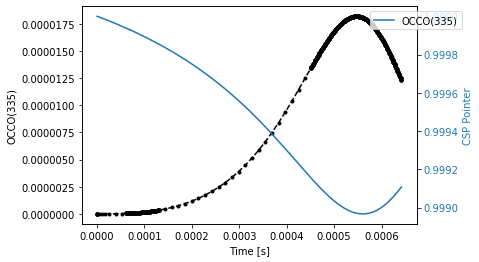

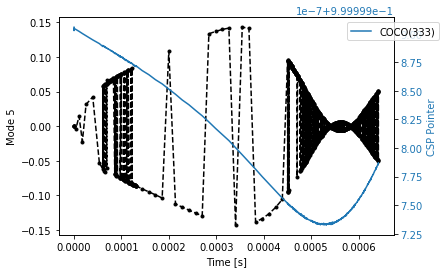

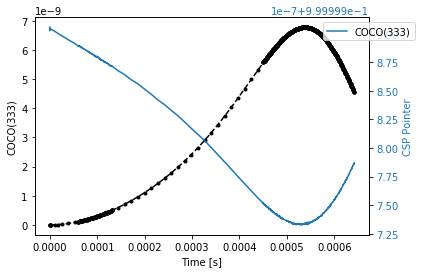

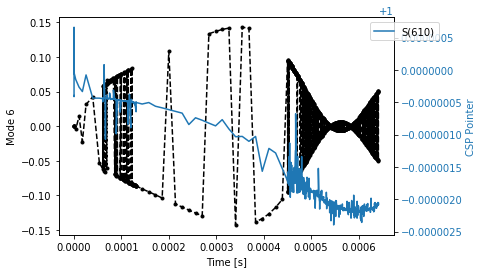

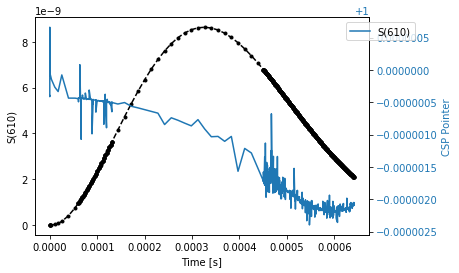

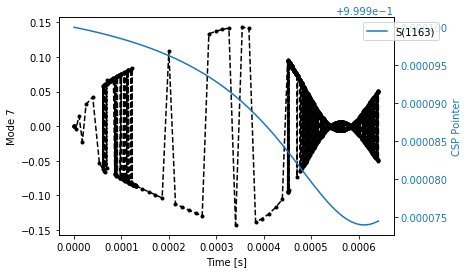

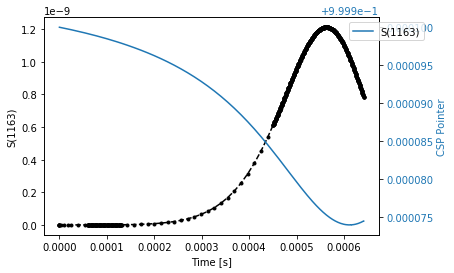

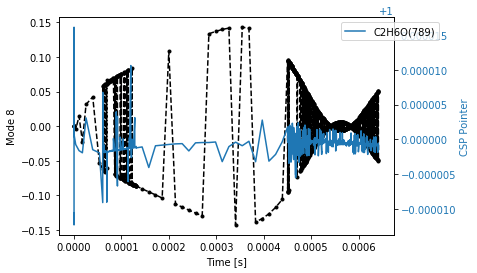

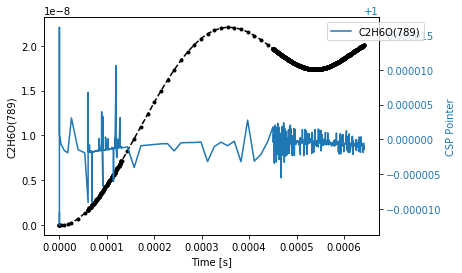

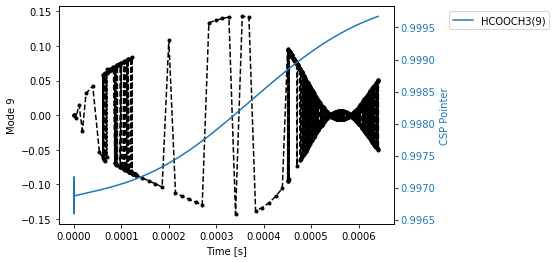

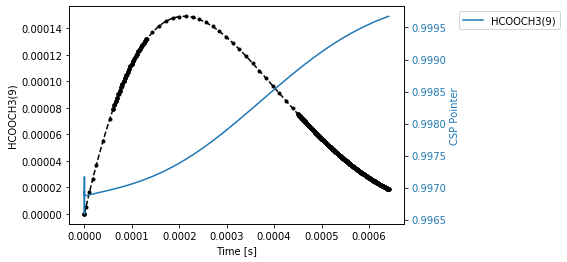

In [29]:
for IndVar in range(10):
    MaxPInd, IndxList = getTopIndex(Ptrs, IndVar, Top=2, threshold=1e-3)   
    makePlotIndices(solTchem[:,Header.index('t')], f[:,ModN],\
                Ptrs[:,IndVar,:], IndxList, nameRHS,\
                xlabel_1='Time [s]', ylabel_1='Mode '+str(IndVar), ylabel_2='CSP Pointer', \
                legend_loc_x=1.15, legend_loc_y=1)
# plt.savefig('Mode'+str(IndVar)+'_CSPPointer.pdf', bbox_inches='tight')
    VarName = nameRHS[IndxList[0]]
    makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                Ptrs[:,IndVar,:], IndxList, nameRHS,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='CSP Pointer', \
                legend_loc_x=1.15, legend_loc_y=1)